#Shoping Revenue Prediction

##1.Library

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [ ]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import lazypredict


In [ ]:
from lazypredict.Supervised import LazyClassifier

##Data Extraction

In [ ]:
df=pd.read_csv("online_shoppers_intention.csv")

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.00,0,0.00,2,64.00,0.00,0.10,0.00,0.00,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.00,0,0.00,2,2.67,0.05,0.14,0.00,0.00,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.00,0,0.00,10,627.50,0.02,0.05,0.00,0.00,Feb,3,3,1,4,Returning_Visitor,True,False


##Data Understanding

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00,12330.00
mean,2.32,80.82,0.50,34.47,31.73,1194.75,0.02,0.04,5.89,0.06,2.12,2.36,3.15,4.07
std,3.32,176.78,1.27,140.75,44.48,1913.67,0.05,0.05,18.57,0.20,0.91,1.72,2.40,4.03
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00
25%,0.00,0.00,0.00,0.00,7.00,184.14,0.00,0.01,0.00,0.00,2.00,2.00,1.00,2.00
50%,1.00,7.50,0.00,0.00,18.00,598.94,0.00,0.03,0.00,0.00,2.00,2.00,3.00,2.00
75%,4.00,93.26,0.00,0.00,38.00,1464.16,0.02,0.05,0.00,0.00,3.00,2.00,4.00,4.00
max,27.00,3398.75,24.00,2549.38,705.00,63973.52,0.20,0.20,361.76,1.00,8.00,13.00,9.00,20.00


In [ ]:
df.shape

(12330, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
char=df[['Weekend','Revenue','Month','VisitorType']]
num=df.drop(['Weekend','Revenue','Month','VisitorType'], axis=1)

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.00,0,0.00,2,64.00,0.00,0.10,0.00,0.00,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.00,0,0.00,2,2.67,0.05,0.14,0.00,0.00,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.00,0,0.00,10,627.50,0.02,0.05,0.00,0.00,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder, MinMaxScaler, StandardScaler, RobustScaler

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,weekend_enc,revenue_enc
0,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,1,1,1,1,0,0
1,0,0.00,0,0.00,2,64.00,0.00,0.10,0.00,0.00,2,2,1,2,0,0
2,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,4,1,9,3,0,0
3,0,0.00,0,0.00,2,2.67,0.05,0.14,0.00,0.00,3,2,2,4,0,0
4,0,0.00,0,0.00,10,627.50,0.02,0.05,0.00,0.00,3,3,1,4,1,0


In [ ]:
label12= LabelEncoder()
df['weekend_enc']= label12.fit_transform(df['Weekend'])
df['revenue_enc']= label12.fit_transform(df['Revenue'])

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,weekend_enc,revenue_enc
0,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Feb,1,1,1,1,Returning_Visitor,False,False,0,0
1,0,0.00,0,0.00,2,64.00,0.00,0.10,0.00,0.00,Feb,2,2,1,2,Returning_Visitor,False,False,0,0
2,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,Feb,4,1,9,3,Returning_Visitor,False,False,0,0
3,0,0.00,0,0.00,2,2.67,0.05,0.14,0.00,0.00,Feb,3,2,2,4,Returning_Visitor,False,False,0,0
4,0,0.00,0,0.00,10,627.50,0.02,0.05,0.00,0.00,Feb,3,3,1,4,Returning_Visitor,True,False,1,0


In [ ]:
df.duplicated().sum()


0

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
weekend_enc                   2
revenue_enc                   2
dtype: int64

In [ ]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [ ]:
df['Month'].value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [ ]:
df.loc[df['Month']=='May','Month']=5
df.loc[df['Month']=='Feb','Month']=2
df.loc[df['Month']=='Mar','Month']=3
df.loc[df['Month']=='June','Month']=6
df.loc[df['Month']=='Jul','Month']=7
df.loc[df['Month']=='Aug','Month']=8
df.loc[df['Month']=='Sep','Month']=9
df.loc[df['Month']=='Oct','Month']=10
df.loc[df['Month']=='Nov','Month']=11
df.loc[df['Month']=='Dec','Month']=12

In [ ]:
df['Month'].value_counts()

5     3364
11    2998
3     1907
12    1727
10     549
9      448
8      433
7      432
6      288
2      184
Name: Month, dtype: int64

In [ ]:
df.head(100)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,weekend_enc,revenue_enc
0,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,2,1,1,1,1,Returning_Visitor,False,False,0,0
1,0,0.00,0,0.00,2,64.00,0.00,0.10,0.00,0.00,2,2,2,1,2,Returning_Visitor,False,False,0,0
2,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,2,4,1,9,3,Returning_Visitor,False,False,0,0
3,0,0.00,0,0.00,2,2.67,0.05,0.14,0.00,0.00,2,3,2,2,4,Returning_Visitor,False,False,0,0
4,0,0.00,0,0.00,10,627.50,0.02,0.05,0.00,0.00,2,3,3,1,4,Returning_Visitor,True,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0.00,0,0.00,2,33.00,0.00,0.10,0.00,0.20,2,1,1,1,3,Returning_Visitor,False,False,0,0
96,0,0.00,0,0.00,6,1566.50,0.05,0.07,0.00,0.20,2,1,1,1,3,Returning_Visitor,False,False,0,0
97,0,0.00,0,0.00,4,105.00,0.00,0.03,0.00,0.60,2,1,1,1,4,Returning_Visitor,False,False,0,0
98,0,0.00,1,0.00,7,50.00,0.04,0.08,0.00,0.60,2,2,4,1,7,Returning_Visitor,False,False,0,0


Unbalanced Data Label Betwwen False and True Revenue

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


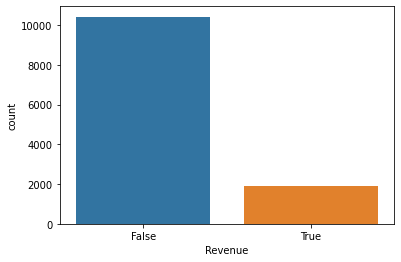

In [ ]:
sn.countplot(df['Revenue'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


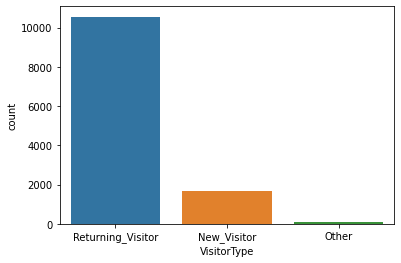

In [ ]:
sn.countplot(df['VisitorType'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


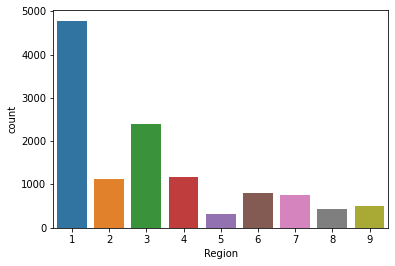

In [ ]:
sn.countplot(df['Region'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


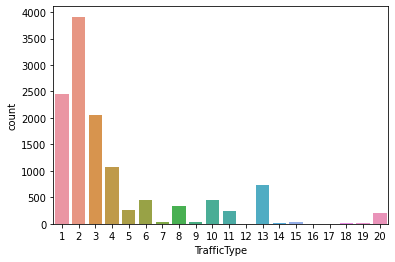

In [ ]:
sn.countplot(df['TrafficType'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


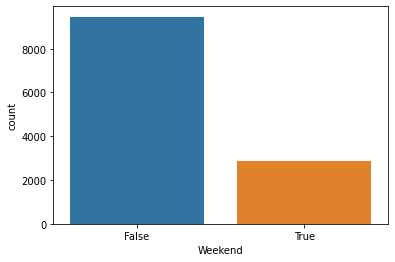

In [ ]:
sn.countplot(df['Weekend'])

In [ ]:
cors=df.corr()

In [ ]:
corrs=cors.corr()

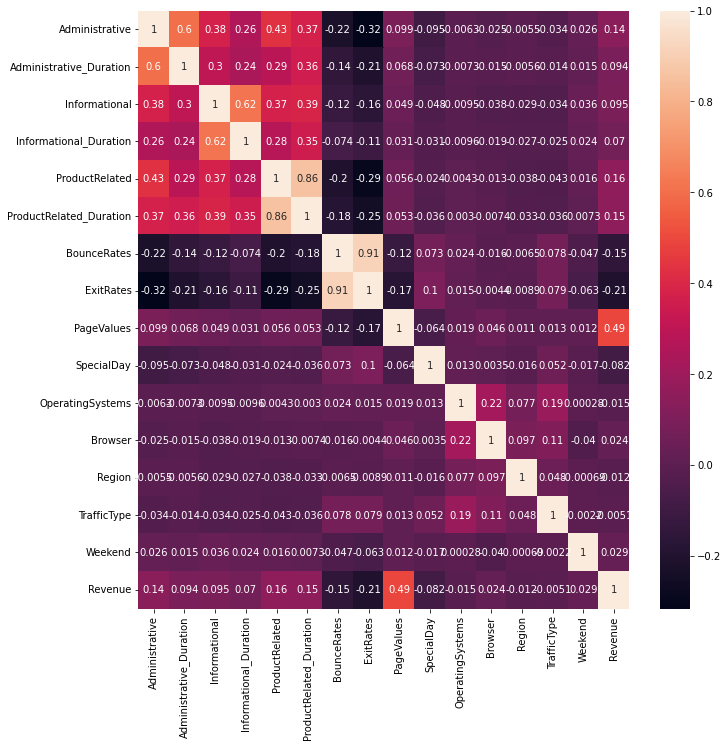

In [ ]:
plt.figure(figsize=(11,11))
sn.heatmap(cors,annot=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


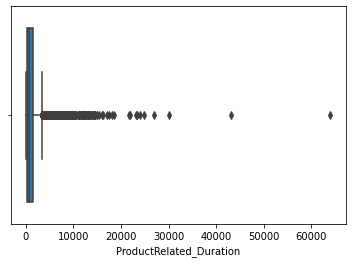

In [ ]:
sn.boxplot(df['ProductRelated_Duration'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


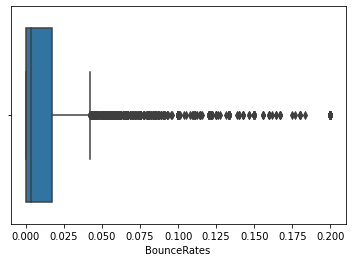

In [ ]:
sn.boxplot(df['BounceRates'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


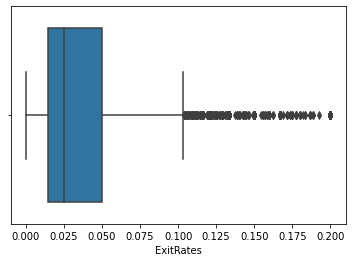

In [ ]:
sn.boxplot(df['ExitRates'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


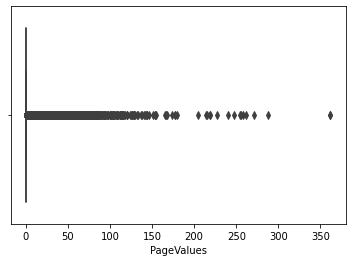

In [ ]:
sn.boxplot(df['PageValues'])

In [ ]:
df['PageValues'].value_counts()

0.000000     9600
53.988000       6
42.293068       3
59.988000       2
16.158558       2
             ... 
6.673696        1
6.094324        1
28.253955       1
16.090650       1
12.241717       1
Name: PageValues, Length: 2704, dtype: int64

In [ ]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
weekend_enc                0
revenue_enc                0
dtype: int64

In [ ]:
visitor=pd.get_dummies(df['VisitorType'])

In [ ]:
x=pd.concat([df,visitor], axis=1)

In [ ]:
x.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Region,TrafficType,VisitorType,Weekend,Revenue,weekend_enc,revenue_enc,New_Visitor,Other,Returning_Visitor
0,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,...,1,1,Returning_Visitor,False,False,0,0,0,0,1
1,0,0.00,0,0.00,2,64.00,0.00,0.10,0.00,0.00,...,1,2,Returning_Visitor,False,False,0,0,0,0,1
2,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,...,9,3,Returning_Visitor,False,False,0,0,0,0,1
3,0,0.00,0,0.00,2,2.67,0.05,0.14,0.00,0.00,...,2,4,Returning_Visitor,False,False,0,0,0,0,1
4,0,0.00,0,0.00,10,627.50,0.02,0.05,0.00,0.00,...,1,4,Returning_Visitor,True,False,1,0,0,0,1


In [ ]:
x=x.drop(['VisitorType','Revenue','Weekend'],axis=1)

In [ ]:
x.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,weekend_enc,revenue_enc,New_Visitor,Other,Returning_Visitor
0,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,2,1,1,1,1,0,0,0,0,1
1,0,0.00,0,0.00,2,64.00,0.00,0.10,0.00,0.00,2,2,2,1,2,0,0,0,0,1
2,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,2,4,1,9,3,0,0,0,0,1
3,0,0.00,0,0.00,2,2.67,0.05,0.14,0.00,0.00,2,3,2,2,4,0,0,0,0,1
4,0,0.00,0,0.00,10,627.50,0.02,0.05,0.00,0.00,2,3,3,1,4,1,0,0,0,1


In [ ]:
Month_rev=df.groupby(['Month'])['Revenue'].sum()

In [ ]:
Month_rev.sort_values()

Month
Feb       3
June     29
Jul      66
Aug      76
Sep      86
Oct     115
Mar     192
Dec     216
May     365
Nov     760
Name: Revenue, dtype: int64

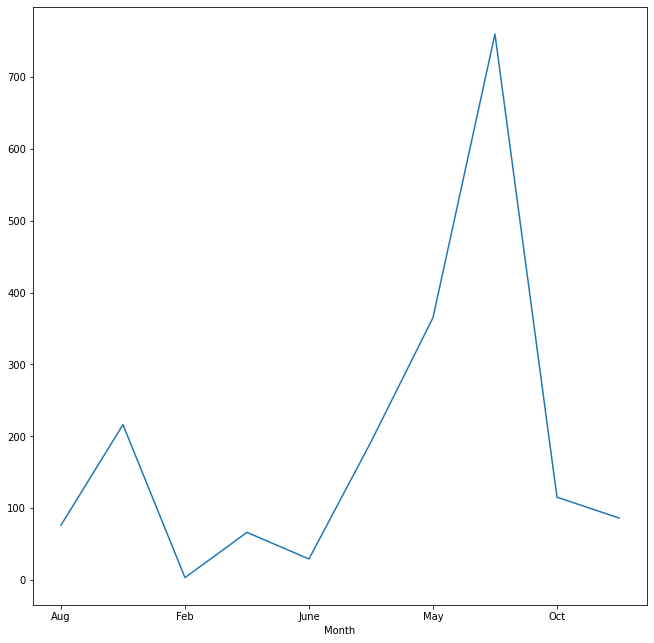

In [ ]:
plt.figure(figsize=(11,11))
Month_rev.plot()

Dari grafik di atas dapat dilihat bahwa revenue tertinggi pada bulan November (menjelang akhir tahun) dan terendah pada bulan Februari (awal tahun).

In [ ]:
region_rev=df.groupby(['Region'])['Revenue'].sum()

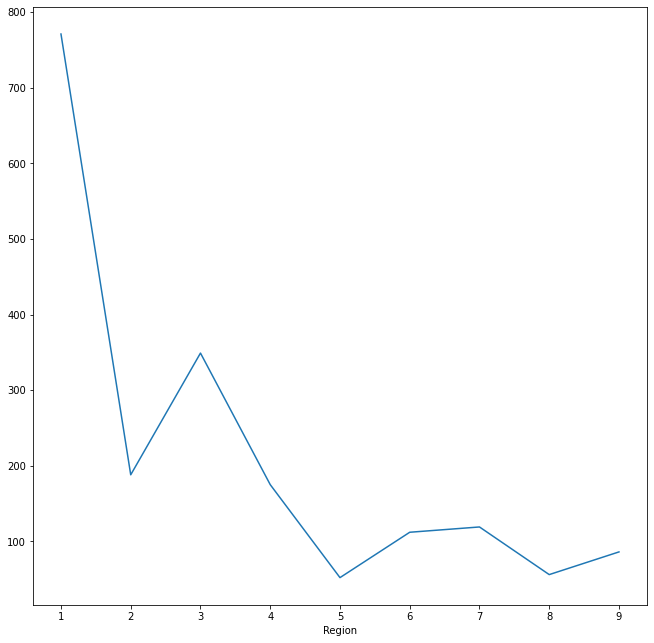

In [ ]:
plt.figure(figsize=(11,11))
region_rev.plot()

In [ ]:
region_rev.sort_values()

Region
5     52
8     56
9     86
6    112
7    119
4    175
2    188
3    349
1    771
Name: Revenue, dtype: int64

####Dari hasil grafik di atas Region 1 mempunyai Revenue terbesar sedangkan Region 5 terkecil;


##Data Preparation

###Feature Selection

In [ ]:
x.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,weekend_enc,revenue_enc,New_Visitor,Other,Returning_Visitor
0,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,2,1,1,1,1,0,0,0,0,1
1,0,0.00,0,0.00,2,64.00,0.00,0.10,0.00,0.00,2,2,2,1,2,0,0,0,0,1
2,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,2,4,1,9,3,0,0,0,0,1
3,0,0.00,0,0.00,2,2.67,0.05,0.14,0.00,0.00,2,3,2,2,4,0,0,0,0,1
4,0,0.00,0,0.00,10,627.50,0.02,0.05,0.00,0.00,2,3,3,1,4,1,0,0,0,1


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
x['Month'].value_counts()

5     3364
11    2998
3     1907
12    1727
10     549
9      448
8      433
7      432
6      288
2      184
Name: Month, dtype: int64

In [ ]:
x['Month']=pd.to_numeric(x['Month'])

In [ ]:
X=x.drop(['revenue_enc'],axis=1)
y=x['revenue_enc']

In [ ]:
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,weekend_enc,New_Visitor,Other,Returning_Visitor
0,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,2,1,1,1,1,0,0,0,1
1,0,0.00,0,0.00,2,64.00,0.00,0.10,0.00,0.00,2,2,2,1,2,0,0,0,1
2,0,0.00,0,0.00,1,0.00,0.20,0.20,0.00,0.00,2,4,1,9,3,0,0,0,1
3,0,0.00,0,0.00,2,2.67,0.05,0.14,0.00,0.00,2,3,2,2,4,0,0,0,1
4,0,0.00,0,0.00,10,627.50,0.02,0.05,0.00,0.00,2,3,3,1,4,1,0,0,1


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: revenue_enc, dtype: int64

###Data Split for training

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest =train_test_split(X,y,test_size=0.25, random_state=7)

In [ ]:
from sklearn.pipeline import Pipeline
pipe_ds = Pipeline([ ('std', StandardScaler()), ('Decision_tree', DecisionTreeClassifier())], verbose = True)
pipe_rf= Pipeline([('std',StandardScaler()), ('Random_Forest', RandomForestClassifier())], verbose=True)
pipe_xgb= Pipeline([('std',StandardScaler()), ('XGB', XGBClassifier())], verbose=True)
pipe_ds.fit(xtrain, ytrain)
pipe_rf.fit(xtrain, ytrain)
pipe_xgb.fit(xtrain, ytrain)

[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Decision_tree, total=   0.1s
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_Forest, total=   1.3s
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing XGB, total=   0.8s


Pipeline(steps=[('std', StandardScaler()), ('XGB', XGBClassifier())],
         verbose=True)

In [ ]:
pipe.score(xtest, ytest)

0.8673370094064223

In [ ]:
pipe_rf.score(xtest, ytest)

0.9036652611093091

In [ ]:
pipe_xgb.score(xtest, ytest)

0.9059357768407396

Feature: 0, Score: 0.00368
Feature: 1, Score: 0.00435
Feature: 2, Score: 0.00056
Feature: 3, Score: 0.00087
Feature: 4, Score: 0.00273
Feature: 5, Score: 0.00357
Feature: 6, Score: 0.00337
Feature: 7, Score: 0.00755
Feature: 8, Score: 0.14428
Feature: 9, Score: 0.00045
Feature: 10, Score: 0.01136
Feature: 11, Score: 0.00024
Feature: 12, Score: 0.00024
Feature: 13, Score: 0.00080
Feature: 14, Score: 0.00223
Feature: 15, Score: -0.00013
Feature: 16, Score: 0.00011
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00099


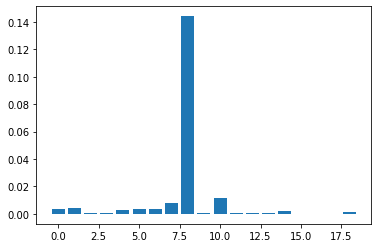

In [ ]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot
results = permutation_importance(pipe_xgb, xtrain, ytrain, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9247 entries, 6895 to 9412
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           9247 non-null   int64  
 1   Administrative_Duration  9247 non-null   float64
 2   Informational            9247 non-null   int64  
 3   Informational_Duration   9247 non-null   float64
 4   ProductRelated           9247 non-null   int64  
 5   ProductRelated_Duration  9247 non-null   float64
 6   BounceRates              9247 non-null   float64
 7   ExitRates                9247 non-null   float64
 8   PageValues               9247 non-null   float64
 9   SpecialDay               9247 non-null   float64
 10  Month                    9247 non-null   int64  
 11  OperatingSystems         9247 non-null   int64  
 12  Browser                  9247 non-null   int64  
 13  Region                   9247 non-null   int64  
 14  TrafficType          

###Normalization MinMax

In [ ]:
lm=MinMaxScaler()
xtrain_mm=lm.fit_transform(xtrain)
xtest_mm=lm.fit_transform(xtest)


###Standarization StandarScaler

In [ ]:
sts=StandardScaler()
xtrain_ss=sts.fit_transform(xtrain)
xtest_ss=sts.fit_transform(xtest)


###Log Transformation

In [ ]:
class LogTransform():
  def _init_(self):
      pass

  def fit(self,X):
      return self
  
  def transform(self,X):
       return np.log(X+1)

  def inverse_tranform(self,X):
      return np.exp(X)-1
  
class SqrtTransform():
  def _init_(self):
       pass

  def fit(self,X):
      return self

  def Transform(self,X):
       return np.sqrt(X)

  def Inverse(self,X):
       return np.power(X,2) 

In [ ]:
lg=LogTransform()
xtrain_log=lg.transform(xtrain)
xtest_log=lg.transform(xtest)

###Oversampling and Undersampling

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
ovr=SMOTE()
ud=RandomUnderSampler(sampling_strategy='majority')
xtrain_os,ytrain_os=ovr.fit_resample(xtrain,ytrain)

xtrain_ud,ytrain_ud=ud.fit_resample(xtrain,ytrain)


In [ ]:
xtrain_os_mm=lm.fit_transform(xtrain_os)
xtest_mm=lm.fit_transform(xtest)
xtrain_ud_mm=lm.fit_transform(xtrain_ud)



##Modeling Algorithm

###AutoML without Standarization/Normalization/log

In [ ]:
lzc=LazyClassifier(predictions=True)

In [ ]:
models,predictions=lzc.fit(xtrain,xtest,ytrain,ytest)
models

100%|██████████| 29/29 [00:24<00:00,  1.17it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.91,0.77,0.77,0.90,0.73
LGBMClassifier,0.90,0.77,0.77,0.90,0.33
QuadraticDiscriminantAnalysis,0.74,0.76,0.76,0.77,0.05
AdaBoostClassifier,0.89,0.75,0.75,0.89,0.53
NearestCentroid,0.79,0.75,0.75,0.81,0.05
BaggingClassifier,0.90,0.75,0.75,0.89,0.41
SGDClassifier,0.88,0.75,0.75,0.87,0.10
DecisionTreeClassifier,0.87,0.74,0.74,0.87,0.10
RandomForestClassifier,0.90,0.74,0.74,0.89,2.52


In [ ]:
models_os,predictions_os=lzc.fit(xtrain_os,xtest,ytrain_os,ytest)
models_os

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 29/29 [01:05<00:00,  2.25s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.89,0.85,0.85,0.90,1.26
RandomForestClassifier,0.89,0.83,0.83,0.90,2.48
AdaBoostClassifier,0.89,0.82,0.82,0.89,0.95
LGBMClassifier,0.89,0.82,0.82,0.90,0.53
SGDClassifier,0.89,0.80,0.80,0.89,0.13
LogisticRegression,0.87,0.80,0.80,0.88,0.11
BaggingClassifier,0.89,0.79,0.79,0.89,0.90
CalibratedClassifierCV,0.87,0.79,0.79,0.87,6.04
SVC,0.87,0.78,0.78,0.87,6.34


In [ ]:
model_ud,prediction_ud=lzc.fit(xtrain_ud,xtest,ytrain_ud,ytest)
model_ud

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 29/29 [00:07<00:00,  3.83it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.87,0.87,0.87,0.88,0.28
RandomForestClassifier,0.86,0.86,0.86,0.87,0.60
LGBMClassifier,0.84,0.85,0.85,0.85,0.23
BaggingClassifier,0.85,0.85,0.85,0.86,0.24
AdaBoostClassifier,0.86,0.84,0.84,0.87,0.53
ExtraTreesClassifier,0.83,0.84,0.84,0.84,0.43
LogisticRegression,0.86,0.81,0.81,0.87,0.05
SVC,0.84,0.81,0.81,0.86,0.63
NuSVC,0.84,0.81,0.81,0.85,0.74


### Minmax AutoML

In [ ]:
model_mm,predictions_mm=lzc.fit(xtrain_mm,xtest_mm,ytrain,ytest)

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 29/29 [00:23<00:00,  1.25it/s]


In [ ]:
model_mm

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SGDClassifier,0.85,0.79,0.79,0.86,0.09
AdaBoostClassifier,0.89,0.79,0.79,0.89,0.53
XGBClassifier,0.90,0.78,0.78,0.90,0.72
BernoulliNB,0.83,0.77,0.77,0.84,0.03
NearestCentroid,0.73,0.77,0.77,0.77,0.03
LGBMClassifier,0.90,0.76,0.76,0.90,0.33
QuadraticDiscriminantAnalysis,0.68,0.76,0.76,0.72,0.03
CalibratedClassifierCV,0.89,0.76,0.76,0.88,4.10
RandomForestClassifier,0.90,0.76,0.76,0.89,1.24


##Log AutoML

In [ ]:
models_log,prediction_log=lzc.fit(xtrain_log,xtest_log,ytrain,ytest)
models_log

100%|██████████| 29/29 [00:26<00:00,  1.09it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.81,0.83,0.83,0.83,0.03
QuadraticDiscriminantAnalysis,0.80,0.82,0.82,0.83,0.07
LinearDiscriminantAnalysis,0.89,0.80,0.80,0.89,0.13
LGBMClassifier,0.91,0.79,0.79,0.90,0.35
PassiveAggressiveClassifier,0.88,0.79,0.79,0.88,0.07
GaussianNB,0.74,0.78,0.78,0.77,0.03
XGBClassifier,0.90,0.78,0.78,0.90,0.81
BernoulliNB,0.85,0.78,0.78,0.85,0.04
RidgeClassifierCV,0.90,0.77,0.77,0.89,0.05


In [ ]:
models_os_mm,prediction_os_mm=lzc.fit(xtrain_os_mm,xtest_mm,ytrain_os,ytest)
models_os_mm

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 29/29 [01:08<00:00,  2.35s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.89,0.85,0.85,0.90,1.27
LogisticRegression,0.85,0.84,0.84,0.86,0.13
SGDClassifier,0.86,0.83,0.83,0.87,0.15
AdaBoostClassifier,0.89,0.83,0.83,0.89,1.11
RandomForestClassifier,0.90,0.83,0.83,0.90,2.49
LGBMClassifier,0.90,0.83,0.83,0.90,0.51
CalibratedClassifierCV,0.83,0.82,0.82,0.85,5.65
LinearSVC,0.84,0.82,0.82,0.85,1.56
ExtraTreesClassifier,0.89,0.80,0.80,0.89,1.37


In [ ]:
models_ud_mm,prediction_ud_mm=lzc.fit(xtrain_ud_mm,xtest_mm,ytrain_ud,ytest)
models_ud_mm

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 29/29 [00:06<00:00,  4.24it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.87,0.87,0.87,0.88,0.26
RandomForestClassifier,0.86,0.86,0.86,0.87,0.56
LGBMClassifier,0.84,0.86,0.86,0.86,0.22
ExtraTreesClassifier,0.83,0.86,0.86,0.85,0.40
AdaBoostClassifier,0.87,0.85,0.85,0.88,0.26
BaggingClassifier,0.85,0.85,0.85,0.86,0.15
LogisticRegression,0.87,0.84,0.84,0.88,0.04
CalibratedClassifierCV,0.85,0.83,0.83,0.86,1.09
SVC,0.84,0.83,0.83,0.86,0.62


In [ ]:
import xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model_xgb=XGBClassifier(random_state=10)
model_xgb.fit(xtrain_log,ytrain)
scores=model_xgb.score(xtrain_log,ytrain)
print("Score:",scores)


Score: 0.9165300994209549


In [ ]:
from sklearn.metrics import classification_report
predict_y=model_xgb.predict(xtest)
reports=classification_report(ytest,predict_y)
print(reports)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2590
           1       0.69      0.56      0.62       462

    accuracy                           0.90      3052
   macro avg       0.81      0.76      0.78      3052
weighted avg       0.89      0.90      0.89      3052



###Optimizing and Performance

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model_xgb.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 10,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
n_estimators=[100,500,1000]
max_depth=[3,10,1]
learning_rate=[0.1,0.01,0.05]
grid = dict(n_estimators=n_estimators,
            max_depth=max_depth,
learning_rate=learning_rate
            )


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv=RepeatedStratifiedKFold(n_splits=10 ,n_repeats=3 , random_state=0)
grid_search=GridSearchCV(estimator=model_xgb, param_grid=grid, n_jobs=-1, cv=cv,scoring='balanced_accuracy', error_score=0)
grid_result=grid_search.fit(xtrain_log,ytrain)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.806414 using {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 100}


###Testing Prediction Acuraccy

In [ ]:
n1=model_xgb.predict(xtest[:1])

if n1==0 :
   print('Tidak ada Revenue')
elif n1==1:
   print('Ada Revenue')

###Save Model